# Lab Assignment 2 - Part A: Linear Regression
Please refer to the `README.pdf` for full laboratory instructions.

## Problem Statement
A dataset is included related to red and white vinho verde wine samples, from the north of Portugal. In this exercise, we look at a subset of the data and try to **predict wine's citric acid level based on other features**.

### Dataset Description
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. **citric acid** (TARGET - what we want to predict)
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

### Your Tasks
1. **Implement linear regression** from scratch using least-squares (you may use `np.linalg.lstsq()`)
2. Start with 'alcohol' and 'density' as features. **Find a 3rd feature** that improves prediction the most
3. **Find the 4th feature**. Analyze what happens with all features
4. **Provide plots** comparing predictions vs actual values

## Setup: Load the Dataset
The data is provided through `ucimlrepo`. Install and import required packages below.

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
# We take 100 samples and predict the citric acid number through various features
X = wine_quality.data.features[:100]
X = X.drop(columns=['citric_acid'])
y = wine_quality.data.features[:100]['citric_acid']
print(X.keys())

Index(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


### Write and Run Your Own Code

In [4]:
#Library declarations
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Task 1: Implement Linear Regression
# Hint: You can use np.linalg.lstsq() or implement the normal equation: w = (X^T X)^{-1} X^T y

def linear_regression(X, y):
    
    """
    Implement linear regression using least-squares.
    
    Parameters:
    -----------
    X : numpy array of shape (n_samples, n_features)
    y : numpy array of shape (n_samples,)
    
    Returns:
    --------
    coefficients : numpy array
    """
    # First convert into numpy
    X_np = np.asarray(X)
    y_np = np.asarray(y)

    # X * x = y
    # Dimensional check
    if X_np.shape[0] == y_np.shape[0]:
        # Check output validity
        output = np.linalg.lstsq(X, y)
        return output[0]
    else:
        print("Mismatching dimensions")


def compute_error(X, y, coefficients):
    """
    Compute the prediction error.
    
    Returns:
    --------
    error : float (e.g., RMSE or L2 norm)
    """
    # Square root of the sum of the squared errors divided by N
    res  = 0.0

    for i in range(len(y)):
        res += np.square(y[i] - np.dot(X[i], coefficients))

    return np.sqrt(res / len(y))



## Task 2: Start with Two Features
Use 'alcohol' and 'density' as initial features. Train your model and compute the error.

In [6]:
# Create feature matrix with 'alcohol' and 'density'
X_2features = np.vstack((np.ones(len(X)), X['alcohol'], X['density'])).T

model_2 = linear_regression(X_2features, y)
error_2 = compute_error(X_2features, y, model_2)
print(f"Error with 2 features: {error_2:.4f}")


Error with 2 features: 0.1686


## Task 3: Find the 3rd Feature
Try adding each remaining feature one at a time. Which one improves the model the most?

**Hint**: You might want to look at correlations between features.


In [7]:
# TODO: Try each remaining feature and find the best 3rd feature
minimum_loss = float('inf')
minimum_key = None
for key in X.keys():
     if key not in ['alcohol', 'density']:
         X_new = np.vstack((np.ones(len(X)), X['alcohol'], X['density'], X[key])).T

         

         new_model = linear_regression(X_new, y)
         new_error = compute_error(X_new, y, new_model)
         print(f"Feaure {key} with loss: {new_error}")
         if new_error < minimum_loss:
            minimum_loss = new_error
            minimum_key = key
X_3features = np.vstack((X_2features.T, X[minimum_key])).T
model_3 = linear_regression(X_3features, y)
print(f"The key associated with the minimum loss {minimum_loss} is key: {minimum_key}")


Feaure fixed_acidity with loss: 0.15377490505423422
Feaure volatile_acidity with loss: 0.1320398351814101
Feaure residual_sugar with loss: 0.1634194131066388
Feaure chlorides with loss: 0.16370508319317764
Feaure free_sulfur_dioxide with loss: 0.16753201669570253
Feaure total_sulfur_dioxide with loss: 0.16180581128965077
Feaure pH with loss: 0.16050658166441525
Feaure sulphates with loss: 0.16295818985903135
The key associated with the minimum loss 0.1320398351814101 is key: volatile_acidity


## Task 4: Find the 4th Feature and Full Model
Continue the analysis. What is the best 4th feature? What happens when you use all features?


In [56]:
# TODO: Find the best 4th feature
# TODO: Try each remaining feature and find the best 3rd feature
minimum_loss = float('inf')
minimum_key = None
for key in X.keys():
     if key not in ['alcohol', 'density', 'volatile_acidity']:
         X_new = np.vstack((np.ones(len(X)), X['alcohol'], X['density'], X['volatile_acidity'], X[key])).T

         new_model = linear_regression(X_new, y)
         new_error = compute_error(X_new, y, new_model)
         print(f"Feaure {key} with loss: {new_error}")
         if new_error < minimum_loss:
            minimum_loss = new_error
            minimum_key = key

X_4features = np.vstack((X_3features.T, X[minimum_key])).T
print(f"The fourth key associated with the minimum loss {minimum_loss} is key: {minimum_key}")


# TODO: Train full model with all features
X_all = np.vstack([np.ones(len(X))] + [X[key] for key in X.keys()]).T
model_full = linear_regression(X_all, y)
loss_full = compute_error(X_all, y, model_full)
print("========WITH ALL FEATURES==========")
print(f"Loss: {loss_full}")


Feaure fixed_acidity with loss: 0.12415866052191836
Feaure residual_sugar with loss: 0.12953764310641822
Feaure chlorides with loss: 0.12583160343017333
Feaure free_sulfur_dioxide with loss: 0.13068507822555425
Feaure total_sulfur_dioxide with loss: 0.12576347837118054
Feaure pH with loss: 0.12827032934812826
Feaure sulphates with loss: 0.12893838807242053
The fourth key associated with the minimum loss 0.12415866052191836 is key: fixed_acidity
========WITH ALL FEATURES==========
Loss: 0.10551865184349393


## Task 5: Visualization
Create plots comparing model predictions vs actual values for different feature combinations.


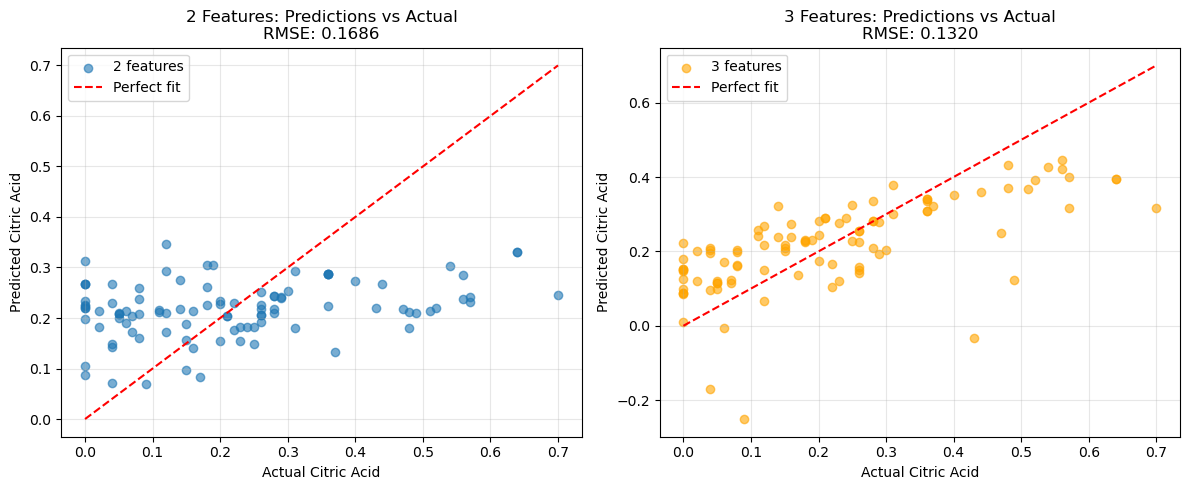

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y, X_2features @ model_2, alpha=0.6, label='2 features')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect fit')
plt.xlabel('Actual Citric Acid')
plt.ylabel('Predicted Citric Acid')
plt.title(f'2 Features: Predictions vs Actual\nRMSE: {error_2:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y, X_3features @ model_3, alpha=0.6, label='3 features', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect fit')
plt.xlabel('Actual Citric Acid')
plt.ylabel('Predicted Citric Acid')
plt.title(f'3 Features: Predictions vs Actual\nRMSE: {compute_error(X_3features, y, model_3):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Summary and Discussion

### Results Table
| Model | Features | Error |
|-------|----------|-------|
| Model 1 | alcohol, density | 0.1686 |
| Model 2 | alcohol, density, volatile_acidity | 0.1320 |
| Model 3 | alcohol, density, volatile_acidity, fixed_acidity | 0.1241 |
| Full Model | all features | 0.1055 |

### Discussion
*Write your analysis here:*
- **Which features are most important for predicting citric acid?**
The features most important are the ones that decrease loss the most: *alcohol, density, volatile_acidity, fixed_acidity*
- **Does adding more features always improve the model?**
No. There exists features that may simply be random noise which will confuse the model. 
- **What did you learn from this exercise?**
I primarily learned how to build linear regression models at a lower level. Formerly, I understood the math, but this exercise had me implement/execute. 
